In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Input
from PIL import Image, ImageFilter
import cv2
import os

ModuleNotFoundError: No module named 'cv2'

In [6]:
data = pd.read_csv("gender_classification_v7.csv")
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


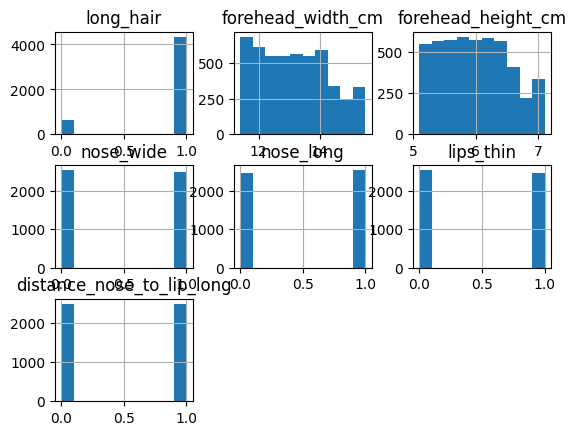

In [94]:
data.hist();

In [95]:
data['gender'] = data['gender'] == 'Male'

In [96]:
data['gender'] = data['gender'].astype('int8')

In [97]:
x = data.drop('gender', axis = 1)

In [98]:
y = data['gender']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 0)

In [100]:
scale = MinMaxScaler()
x_trains = scale.fit_transform(x_train)
x_tests = scale.transform(x_test)

In [101]:
y_train = y_train.values

In [102]:
y_test = y_test.values

In [103]:
y_train_cat = tf.keras.utils.to_categorical(y_train)

In [104]:
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [63]:
model = tf.keras.Sequential([
    Input(shape = (7,)),
    Dense(10, activation = 'sigmoid'),
    Dense(2, activation = 'softmax')
])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102 (408.00 B)

 Trainable params: 102 (408.00 B)

 Non-trainable params: 0 (0.00 B)

In [109]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [114]:
model.fit(x_trains, y_train_cat, epochs = 200, batch_size = 10, validation_data = (x_tests, y_test_cat))

Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9712 - loss: 0.0621 - val_accuracy: 0.9630 - val_loss: 0.1023
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9743 - loss: 0.0646 - val_accuracy: 0.9680 - val_loss: 0.1030
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9751 - loss: 0.0580 - val_accuracy: 0.9660 - val_loss: 0.1025
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9724 - loss: 0.0631 - val_accuracy: 0.9640 - val_loss: 0.1022
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9703 - loss: 0.0630 - val_accuracy: 0.9630 - val_loss: 0.1022
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9685 - loss: 0.0652 - val_accuracy: 0.9620 - val_loss: 0.1025
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9659 - loss: 0.0730 - val_accuracy: 0.9640 - val_loss: 0.1024
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9698 - loss: 0.0623 - val_accu

In [115]:
modelDT = DecisionTreeClassifier(max_depth=5,
    min_samples_split=3,
    min_samples_leaf=3 )
modelDT.fit(x_trains, y_train)
a = modelDT.predict(x_trains)
b = modelDT.predict(x_tests)

print(accuracy_score(y_train, a), accuracy_score(y_test, b))

0.97275 0.9600399600399601


In [116]:
modelRF = RandomForestClassifier(
    n_estimators=400, 
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=5, )
modelRF.fit(x_trains, y_train)
a = modelRF.predict(x_trains)
b = modelRF.predict(x_tests)

print(accuracy_score(y_train, a), accuracy_score(y_test, b))

0.978 0.965034965034965


In [117]:
x_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
2715,1,11.6,5.7,0,0,1,0
788,1,13.5,5.6,1,0,0,0
1457,1,14.5,6.3,1,1,1,0
3568,1,11.5,5.7,1,1,1,1
3529,1,12.7,6.5,1,1,1,1
...,...,...,...,...,...,...,...
4931,1,14.6,5.3,0,1,1,1
3264,1,13.8,6.9,1,1,0,1
1653,1,14.3,6.2,0,1,0,0
2607,0,12.0,6.8,1,1,1,1


In [120]:
x0 = pd.DataFrame(np.array([[1, 13, 6, 1, 1, 1, 1]]),columns = x.columns)

In [121]:
x0s = scale.transform(x0)
np.argmax(model.predict(x0s))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


np.int64(1)

In [97]:
# model.get_weights()

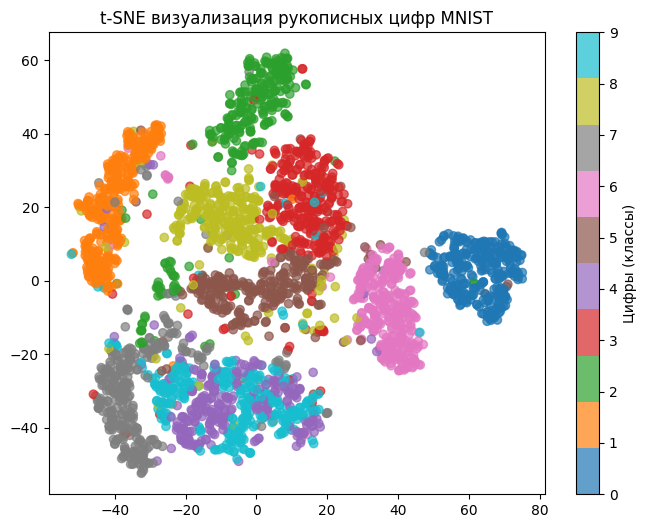

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Загружаем датасет MNIST (70,000 изображений рукописных цифр)
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target.astype(int)

# Берем подвыборку (чтобы быстрее посчитать)
subset = np.random.choice(X.shape[0], 3000, replace=False)
X_subset, y_subset = X.iloc[subset], y.iloc[subset]

# Перед t-SNE часто используют PCA для предварительного уменьшения размерности
pca = PCA(n_components=50)  # Уменьшаем размерность с 784 до 50
X_pca = pca.fit_transform(X_subset)

# Применяем t-SNE (уменьшаем размерность до 2D)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Визуализация
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Цифры (классы)")
plt.title("t-SNE визуализация рукописных цифр MNIST")
plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

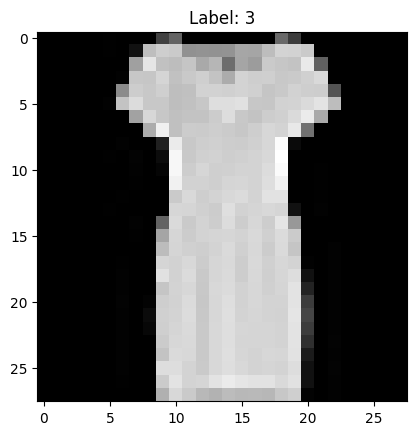

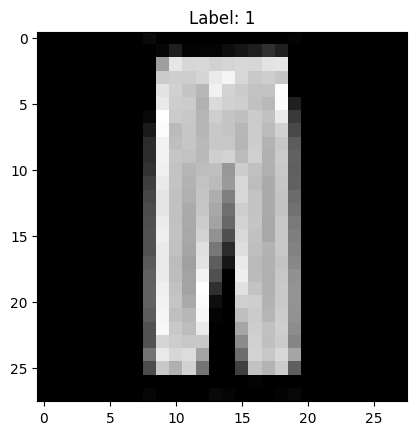

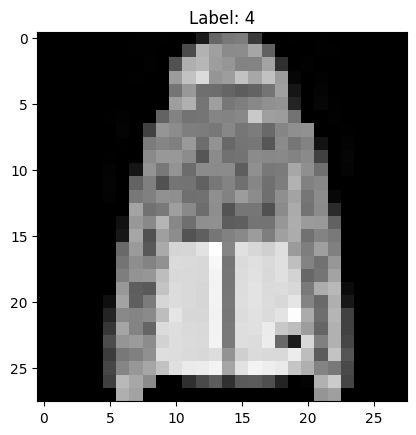

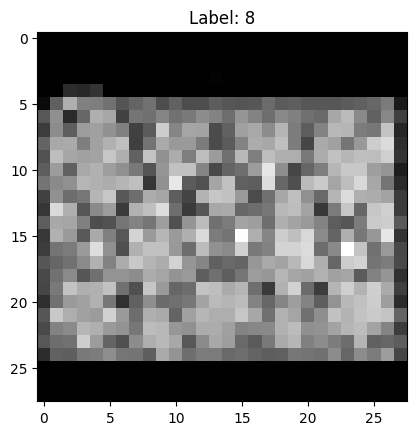

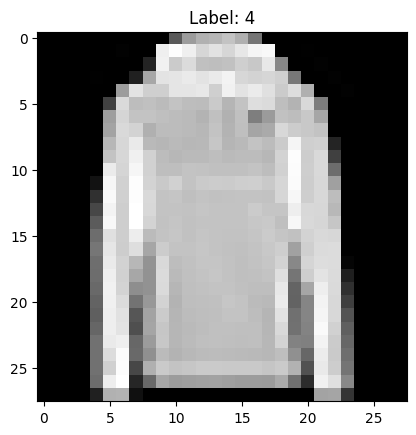

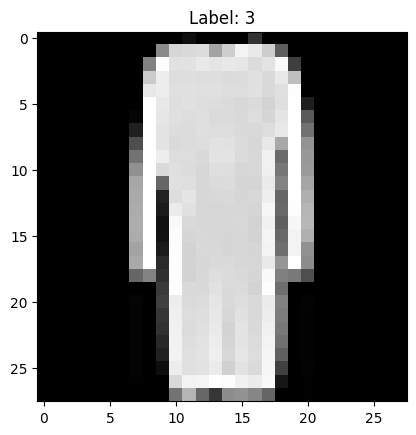

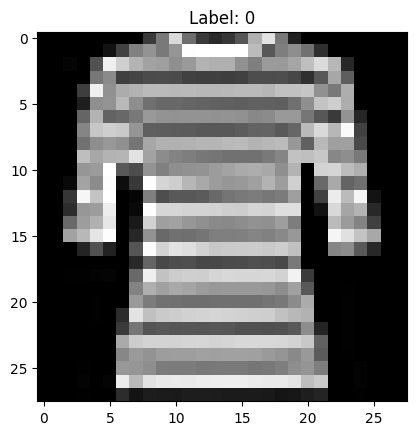

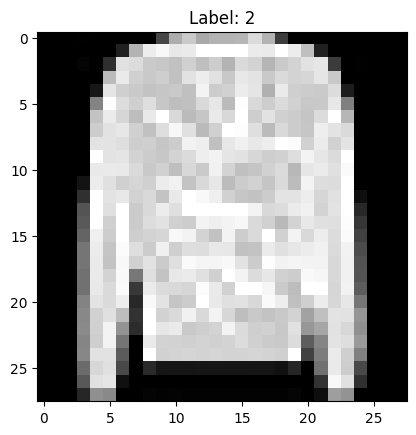

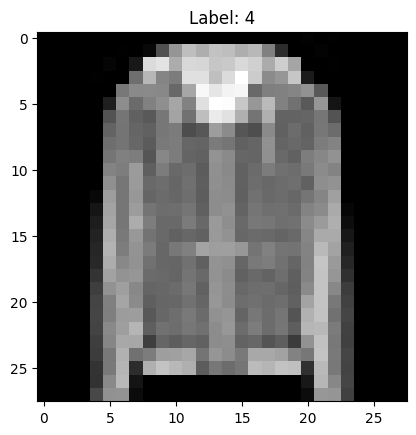

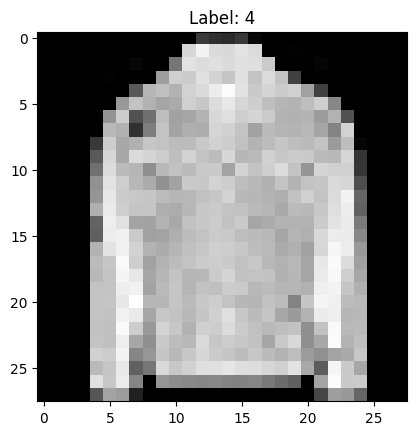

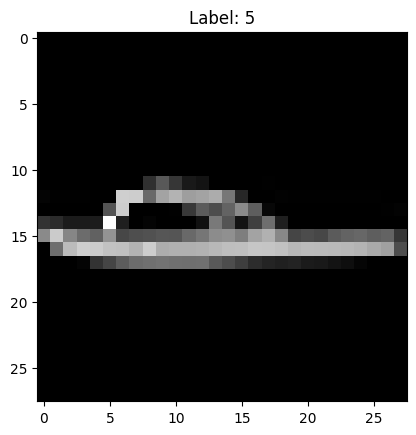

In [4]:
for i in range(20, 31):
    plt.imshow(x_train[i], cmap='gray')  # Передаём сам массив, без f-строки
    plt.title(f"Label: {y_train[i]}")
    plt.show()

In [5]:
y_train_cat = tf.keras.utils.to_categorical(y_train)

In [6]:
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [2]:
model = tf.keras.Sequential([
    Input(shape=(x.shape[1:])),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

NameError: name 'tf' is not defined

In [3]:
x_train = x_train / 255
x_test = x_test / 255

NameError: name 'x_train' is not defined

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7809 - loss: 0.6291 - val_accuracy: 0.8446 - val_loss: 0.4410
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8621 - loss: 0.3859 - val_accuracy: 0.8590 - val_loss: 0.3888
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8750 - loss: 0.3457 - val_accuracy: 0.8554 - val_loss: 0.4029
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8853 - loss: 0.3141 - val_accuracy: 0.8713 - val_loss: 0.3603
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8921 - loss: 0.2950 - val_accuracy: 0.8768 - val_loss: 0.3462
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8965 - loss: 0.2771 - val_accuracy: 0.8720 - val_loss: 0.3503
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9024 - loss: 0.2661 - val_accuracy: 0.8782 - val_loss: 0.3402
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9062 - loss: 0.25

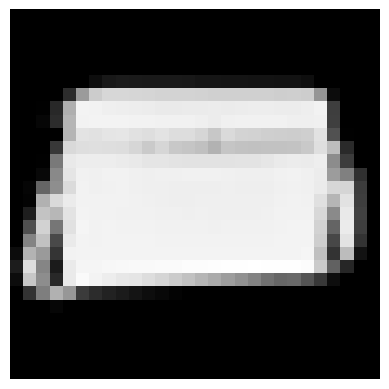

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


np.int64(8)

In [10]:
# Открываем изображение
image = Image.open("AChzlJrinFijKepx0fSByvGZz2soaWEjBb9IJVMM.jpg")

image = image.resize((28, 28))

gray_image = image.convert("L")

gray_image = np.array(gray_image)

# Инвертируем цвета: инвертируем пиксели
inverted_image = 255 - gray_image  # Белые становятся черными и наоборот

# Отображаем результат
plt.imshow(inverted_image, cmap='gray')
plt.axis('off')  # Отключаем оси
plt.show()

# Добавляем размерность для батча (batch size) и приводим тип данных к float32
inverted_image = np.expand_dims(inverted_image, axis=0).astype('float32')

# Если нужно, нормализуем данные (например, для MNIST нормализация в диапазон [0, 1])
inverted_image /= 255.0

# Теперь передаем в модель
np.argmax(model.predict(inverted_image))